Building a Prediction model for banking loan approval info for a Nationalized Bank


🌲 Random Forest Results (with SMOTE):
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      1646
           1       0.55      0.38      0.45      1014

    accuracy                           0.65      2660
   macro avg       0.61      0.59      0.59      2660
weighted avg       0.63      0.65      0.63      2660

✅ Accuracy: 0.6451127819548872


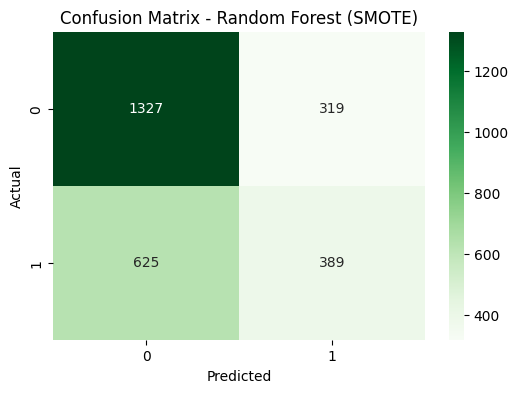

In [66]:
# Import all required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# NEW: For SMOTE
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_excel("/content/drive/MyDrive/PGP Datasets/dataset ml 1.xlsx")

# Clean column names
df.columns = df.columns.str.strip().str.upper()

# Encode categorical variables
df['NEW_CUST'] = df['NEW_CUST'].map({'Y': 1, 'N': 0})
df['SEX'] = df['SEX'].map({'M': 1, 'F': 0})

# Define features and target
X = df.drop(['APP_ID', 'STATUS'], axis=1)
y = df['STATUS']

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Impute missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_cols_valid = [col for col in num_cols if X[col].notna().sum() > 0]
num_cols_empty = [col for col in num_cols if X[col].notna().sum() == 0]

X[num_cols_valid] = pd.DataFrame(
    num_imputer.fit_transform(X[num_cols_valid]),
    columns=num_cols_valid,
    index=X.index
)

for col in num_cols_empty:
    X[col] = 0

if len(cat_cols) > 0:
    X[cat_cols] = pd.DataFrame(
        cat_imputer.fit_transform(X[cat_cols]),
        columns=cat_cols,
        index=X.index
    )

# Split dataset before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# ✅ Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# ✅ Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sm, y_train_sm)
rf_preds = rf_model.predict(X_test)

# ✅ Evaluation
print("\n🌲 Random Forest Results (with SMOTE):")
print(classification_report(y_test, rf_preds))
print("✅ Accuracy:", accuracy_score(y_test, rf_preds))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
